In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('IMDb_movies.csv', low_memory=False)
df = df.dropna(subset=['imdb_title_id', 'actors', 'genre', 'country']) # Limpa rows com NaN
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
subdf = df[['imdb_title_id', 'title', 'actors', 'country', 'genre']]
subdf.head()

,imdb_title_id,title,actors,country,genre
0,tt0000009,Miss Jerry,"Blanche Bayliss, William Courtenay, Chauncey D...",USA,Romance
1,tt0000574,The Story of the Kelly Gang,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Australia,"Biography, Crime, Drama"
2,tt0001892,Den sorte drøm,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...","Germany, Denmark",Drama
3,tt0002101,Cleopatra,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",USA,"Drama, History"
4,tt0002130,L'Inferno,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Italy,"Adventure, Drama, Fantasy"


In [4]:
network = nx.DiGraph()
for ind in subdf.index:
    movie = subdf['title'][ind]
    this_cast = [x.strip() for x in subdf['actors'][ind].split(',')]
    for actor in this_cast:
        network.add_edge(actor, movie)

In [5]:
print(f'Nodes: {len(network.nodes())} \n'
      f'Edges: {len(network.edges())}')

Nodes: 498338 
Edges: 1154172


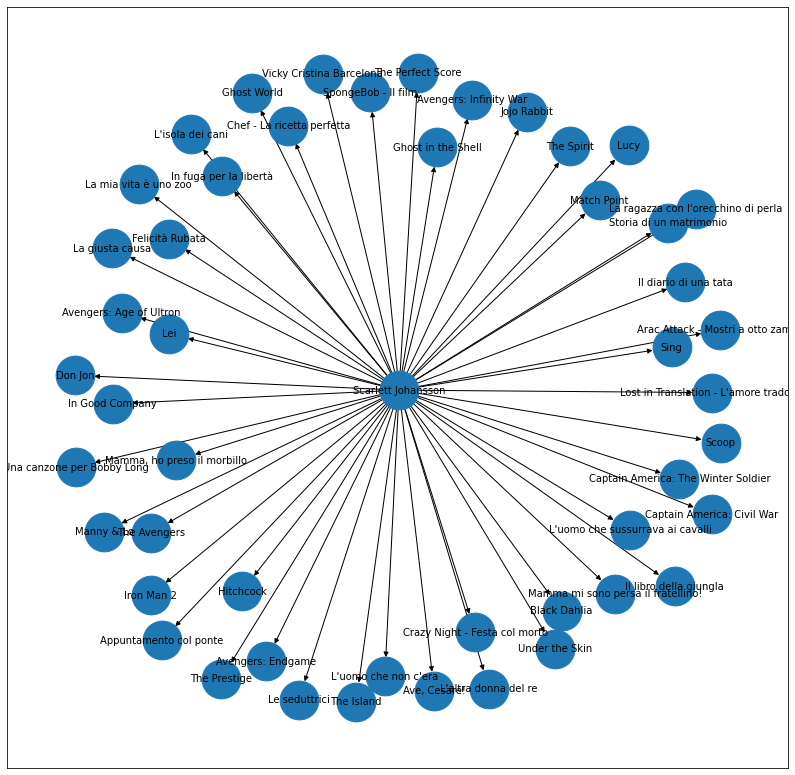

In [65]:
ego = nx.ego_graph(network, 'Scarlett Johansson')
pos = nx.spring_layout(ego, k=0.2, iterations=20)
plt.figure(figsize=(14,14))
nx.draw_networkx(ego, pos, node_size=1500,font_size=10)

In [8]:
data = []
for node in network.nodes():
    out_degree = network.out_degree(node)
    if out_degree > 0:
        row = {
            'actor': node,
            'out_degree': out_degree
        }
        data.append(row)
degree_df = pd.DataFrame(data, columns = ['actor', 'out_degree'])

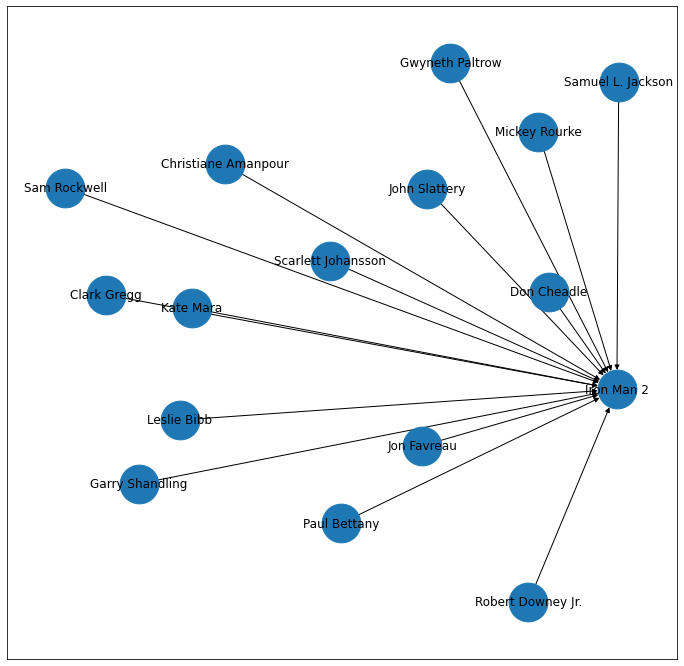

In [102]:


# G = nx.DiGraph()
# for ind in subdf.index[:20]:
#     movie = subdf['title'][ind]
#     this_cast = [x.strip() for x in subdf['actors'][ind].split(',')]
#     for actor in this_cast:
#         G.add_edge(actor, movie)
# # pos = nx.spring_layout(G, k=0.2, iterations=20)
# plt.figure(figsize=(12,12))
# nx.draw_kamada_kawai(G)

# degree_df.query('out_degree > 30')
iron_man2 = nx.DiGraph()
iron_man2.add_edges_from(network.in_edges(['Iron Man 2']))
pos = nx.spring_layout(iron_man2, k=0.2, iterations=20)
plt.figure(figsize=(12,12))
nx.draw_networkx(iron_man2, pos, node_size=1500,font_size=12)

In [103]:
import copy 

# edges = copy.deepcopy(iron_man2.edges())
# for actor in edges:
#     node = actor[0]
#     iron_man2.add_edges_from(network.out_edges([node]))


iron_man2.add_edges_from(network.edges(['Kate Mara']))

# pos = nx.spring_layout(iron_man2, k=0.2, iterations=20)
# plt.figure(figsize=(14,14))
# nx.draw_networkx(iron_man2, pos, node_size=1000,font_size=10)

OutEdgeDataView([('Kate Mara', 'Destini incrociati'), ('Kate Mara', 'Tadpole'), ('Kate Mara', 'The Californians - Il progetto'), ('Kate Mara', 'Zoom'), ('Kate Mara', '14 anni vergine'), ('Kate Mara', 'We Are Marshall'), ('Kate Mara', 'Transsiberian'), ('Kate Mara', 'Shooter'), ('Kate Mara', 'Open Road - La strada per ricominciare'), ('Kate Mara', 'Stone of Destiny'), ('Kate Mara', 'Peep World'), ('Kate Mara', 'Iron Man 2'), ('Kate Mara', 'Ironclad'), ('Kate Mara', 'Happythankyoumoreplease'), ('Kate Mara', 'Fantastic 4 - I fantastici quattro'), ('Kate Mara', '127 ore'), ('Kate Mara', 'Legami di sangue'), ('Kate Mara', 'Transcendence'), ('Kate Mara', 'Man Down'), ('Kate Mara', 'Captive'), ('Kate Mara', 'Sopravvissuto - The Martian'), ('Kate Mara', 'Bastardi insensibili'), ('Kate Mara', 'Morgan'), ('Kate Mara', 'Sergente Rex'), ('Kate Mara', 'Lo scandalo Kennedy'), ('Kate Mara', 'My Days of Mercy')])

In [9]:
degree_df.head()

,actor,out_degree
0,Blanche Bayliss,1
1,William Courtenay,3
2,Chauncey Depew,1
3,Elizabeth Tait,1
4,John Tait,1


In [10]:
degree_df[degree_df['out_degree']==degree_df['out_degree'].max()]

,actor,out_degree
150755,Brahmanandam,317


In [11]:
largest = max(nx.strongly_connected_components(network), key=len)
largest

{'Miss Jerry'}

In [12]:
df[df['title']]

KeyError: "None of [Index(['Miss Jerry', 'The Story of the Kelly Gang', 'Den sorte drøm',\n       'Cleopatra', 'L'Inferno',\n       'From the Manger to the Cross; or, Jesus of Nazareth', 'Madame DuBarry',\n       'Quo Vadis?', 'Independenta Romaniei', 'Richard III',\n       ...\n       'Jessie', 'Enemy Lines', 'Ottam', 'Pengalila', 'Manoharam', 'Le lion',\n       'De Beentjes van Sint-Hildegard', 'Padmavyuhathile Abhimanyu',\n       'Sokagin Çocuklari', 'La vida sense la Sara Amat'],\n      dtype='object', length=85725)] are in the [columns]"